# Обучение без учителя: кластеризация техники понижения размерности

## Введение в обучение без учителя. Базовая кластеризация

### Алгоритм K-MEANS

```python
#Импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

#Инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
#Обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
#Получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

#Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из df2, то мы просто воспользуемся методом predict
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

```

### Пример кластеризации на данных

In [386]:
#Импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
#Импортируем seaborn для визуализации
import seaborn as sns
#Импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

#Загружаем данные
df = pd.read_csv('data/pokemon.csv')
#Датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


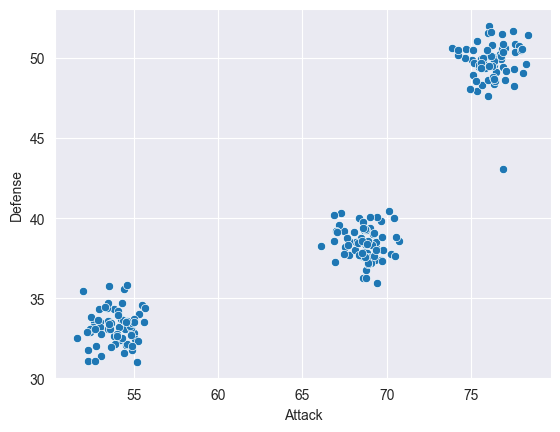

In [387]:
#Попробуем кластеризировать покемонов по силе атаки и уровню защиты
#Для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#Визуализируем матрицу X
sns.scatterplot(x=df.Attack, y=df.Defense);

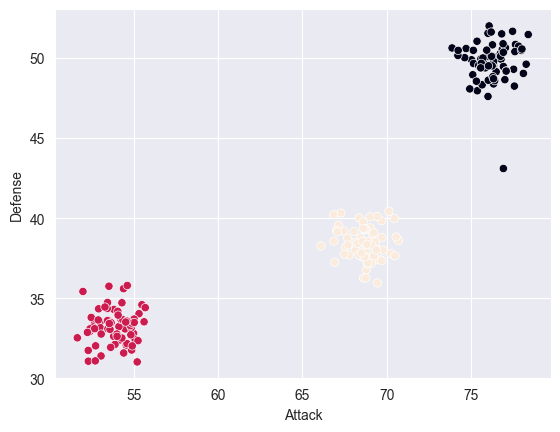

In [388]:
#Инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(
    #Количество кластеров
    n_clusters=3,
    #Стратегия кластеризации
    init='k-means++',
    #Количество запусков алгоритма k-means
    n_init=10,
    #Генератор случайных чисел
    random_state=42
)

#Запустим обучение модели
kmeans.fit(X)

#Предскажем, к какому кластеру принадлежат покемоны
predictions = kmeans.predict(X)
#Eсли мы хотим получить метки класса для тех же данных, 
#на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

#Сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#Визуализируем результаты. Параметр 'с' принимает вектор с номерами классов для
# группировки объектов по цветам
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions);

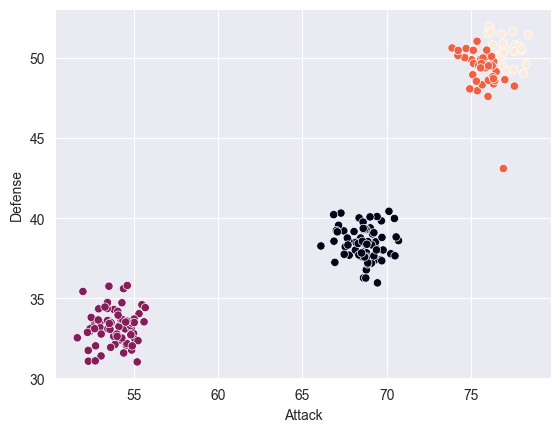

In [389]:
#Попробуем увеличить количество кластеров до 4

#Инициализируем алгоритм k-means с количеством кластеров 4
kmeans = KMeans(
    #Количество кластеров
    n_clusters=4,
    #Стратегия кластеризации
    init='k-means++',
    #Количество запусков алгоритма k-means
    n_init=10,
    #Генератор случайных чисел
    random_state=42
)

#Запустим обучение модели
kmeans.fit(X)

#Предскажем, к какому кластеру принадлежат покемоны
predictions = kmeans.predict(X)
#Eсли мы хотим получить метки класса для тех же данных, 
#на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

#Сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#Визуализируем результаты. Параметр 'с' принимает вектор с номерами классов для
# группировки объектов по цветам
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4);

In [390]:
#В трехмерном и другом n-мерном случае 
#кластеризация запускается следующим образом

#Добавляем третий признак - скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

#Инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(
    #Количество кластеров
    n_clusters=4,
    #Стратегия кластеризации
    init='k-means++',
    #Количество запусков алгоритма k-means
    n_init=10,
    #Генератор случайных чисел
    random_state=42
)

#Запускаем обучение модели 
kmeans.fit(X)

#Предсказываем, к какому кластеру принадлежат покемоны
predictions = kmeans.predict(X)
#Если мы хотим получить метки класса для тех же данных, на 
#которых обучили модель, можно запросить labels
predictions = kmeans.labels_

### Метод локтя

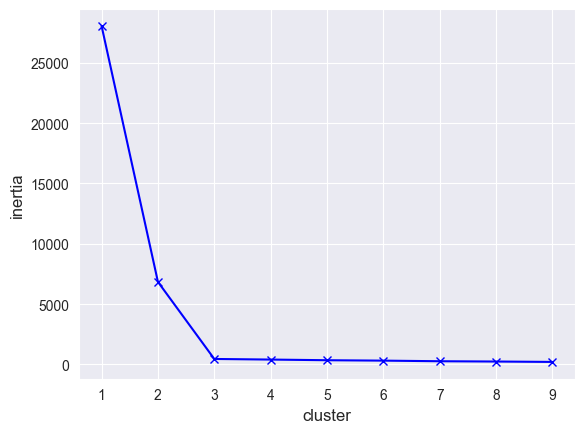

In [391]:
#Напишем функцию, которая будет принимать данные 
#и количество кластеров и возвращать значение инерции
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

X = df[['Attack', 'Defense']]

#Функция, кототорая принимает количество кластеров для k-means
#и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
    #Инициализируем алгоритм кластеризации
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    #Запускаем алгоритм k-means
    k_means.fit(X)
    #Находим значение инерции
    inertia = k_means.inertia_
    #Возвращаем значение инерции
    return inertia

#Создаем пустой список для значений инерции
inertia = []
#Итерируемся по разным размерам кластеров (от 1 до 9) и 
#сохраняем значение инерции для каждого кластера
for cluster_num in range(1,10):
    #Сохраняем значение
    inertia.append(get_inertia(cluster_num, X)) 

#Визуализируем, как менялась инерция в зависимости 
#от количества кластеров
#Задаем название осям x и y
plt.xlabel('cluster', fontsize = 12)
plt.ylabel('inertia', fontsize = 12)
#Рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

### Коэффициент силуэта

<Axes: xlabel='cluster', ylabel='silhouette'>

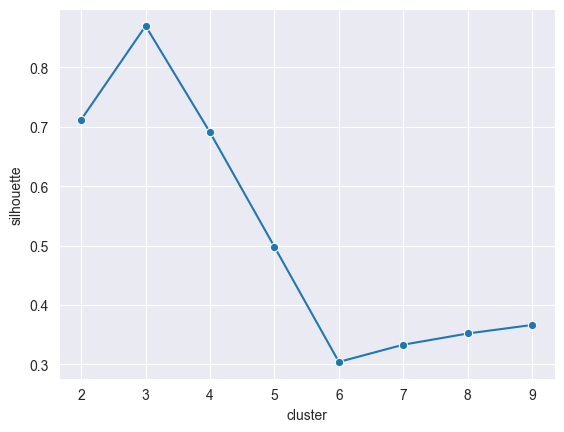

In [392]:
#Посчитаем силуэт, используя sklearn

#Импортируем метрику силуэта
from sklearn.metrics import silhouette_score

#Напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    #Подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

#Создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {'silhouette': [], 'cluster': []}

#Выберем нужные данные
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X))
    silhouette_res['cluster'].append(cluster_num)
    
#Сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

#Установим стиль для визуализации
sns.set_style('darkgrid')
#Визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x='cluster', y='silhouette', marker='o')

### Задание 2.7

Необходимо проанализировать данные, кластеризировать данные и, используя коэффициент силуэта, найти оптимальное количество кластеров.

In [393]:
#Импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
#Импортируем seaborn для визуализации
import seaborn as sns
#Импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

#Загружаем данные
df_2_7 = pd.read_csv('data/values_from_the_instrument.csv')
df_2_7.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<Axes: xlabel='cluster', ylabel='silhouette'>

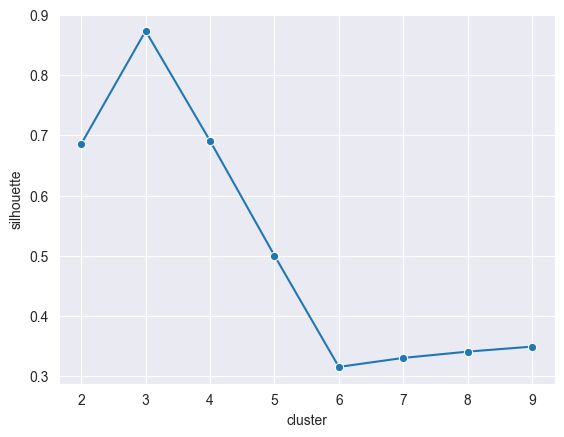

In [394]:
#Посчитаем силуэт, используя sklearn

#Импортируем метрику силуэта
from sklearn.metrics import silhouette_score

#Напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    #Подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

#Создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {'silhouette': [], 'cluster': []}

#Выберем нужные данные
X = df_2_7

for cluster_num in range(2, 10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X))
    silhouette_res['cluster'].append(cluster_num)
    
#Сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

#Установим стиль для визуализации
sns.set_style('darkgrid')
#Визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x='cluster', y='silhouette', marker='o')

## Метрики

### Однородность кластеров

In [395]:
#Рассчитаем метрику однородности в sklearn

#Импортируем подсчет метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

#Передаем предсказанную информацию (к какому кластеру относятся 
#объекты датасета и правильные ответы)
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))

1.0
1.0


In [396]:
#Рассмотрим метрику однородности на 
#примере результатов кластеризации покемонов.
#Рассмотрим два случая - с тремя и четырьмя кластерами

#Передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


### Полнота кластера

In [397]:
#Импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

#Передаем предсказанную информацию (к какому кластеру относятся 
#объекты датасета и правильные ответы)
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


In [398]:
#Рассмотрим метрику полноты на 
#примере результатов кластеризации покемонов.
#Рассмотрим два случая - с тремя и четырьмя кластерами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.8334191510029214


### V-мера (комбинация метрик полноты и однородности)

In [399]:
#Считаем V-меру для двух случаев кластеризации датасета с покемонами

#Импортируем из библиотеки sklearn подсчет V-меры
from sklearn.metrics import v_measure_score

#Подсчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9091419717602737


### Индекс Рэнда

Данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер

In [400]:
#Запустим подсчет индекса Рэнда в sklearn
from sklearn.metrics.cluster import rand_score
#Передаем в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

### Задание 3.3

In [401]:
print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]), 2))

0.74


## Иерархическая кластеризация

### Задание 4.1

In [402]:
#Запустим иерархическую кластеризацию на датасете с покемонами

#Импортируем AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
#Создаем модель кластеризации
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
#Обучаем модель 
agglomerative_clustering.fit(X)
#Выводим предсказанные кластеры
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

## EM-алгоритмы кластеризации

### Запуск EM кластеризации

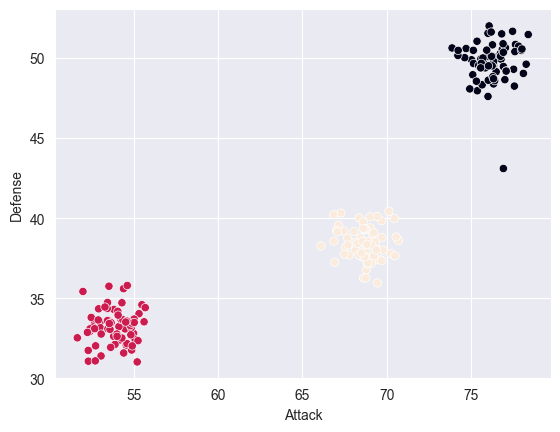

In [403]:
#Импортируем библиотеку numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

#Выберем нужные данные
X = df[['Attack', 'Defense']]

#Создаем модель кластеризации
gm_clustering = GaussianMixture(n_components=3, random_state=42)

#Обучаем модель 
gm_clustering.fit(X)

#Для матрицы X получаем предсказания, к какому классу 
#принадлежат объекты
gm_prediction = gm_clustering.predict(X)

#Сохраним предсказание в датафрейм 
df['Clusters_GM_K3'] = gm_prediction

sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_GM_K3);

In [404]:
#Документация
from sklearn.mixture import GaussianMixture
help(GaussianMixture)

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      - 'full': each component has 

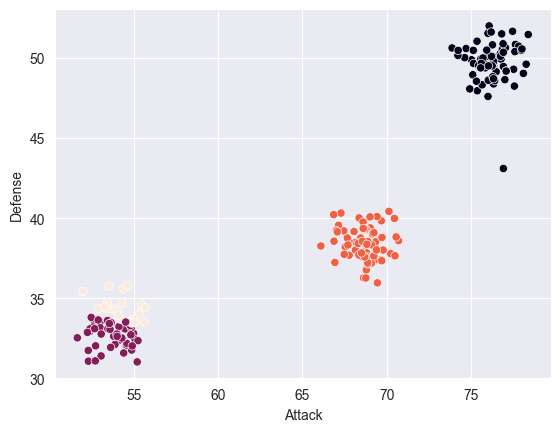

In [405]:
#Если изменить количество кластеров на 4, то получим следующее

#Импортируем библиотеку numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

#Выберем нужные данные
X = df[['Attack', 'Defense']]

#Создаем модель кластеризации
gm_clustering = GaussianMixture(n_components=4, random_state=42)

#Обучаем модель 
gm_clustering.fit(X)

#Для матрицы X получаем предсказания, к какому классу 
#принадлежат объекты
gm_prediction = gm_clustering.predict(X)

#Сохраним предсказание в датафрейм 
df['Clusters_GM_K4'] = gm_prediction

sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_GM_K4);


### Задание 5.4

In [406]:
#Загрузим данные для задания
df_5_4 = pd.read_csv('data/housing.csv')
display(df_5_4.head())

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


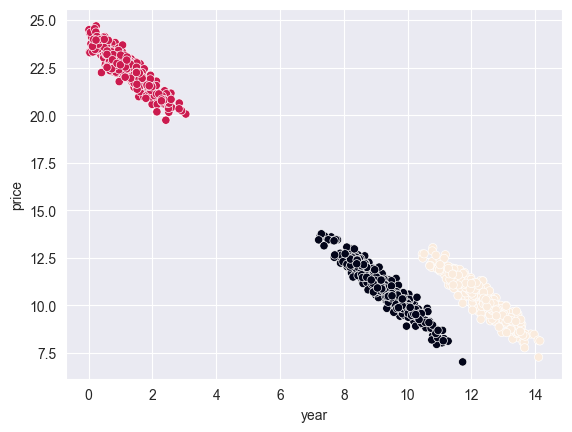

In [407]:
X_5_4 = df_5_4

#Создаем модель кластеризации
gm_5_4 = GaussianMixture(n_components=3, random_state=42)

#Обучаем модель
gm_5_4.fit(X_5_4)

#Предсказываем значения
gm_prediction_5_4 = gm_5_4.predict(X_5_4)

#Сохраняем предсказания в датафрейм
df_5_4['Clusters_GM_5_4'] = gm_prediction_5_4

#Визуализируем
sns.scatterplot(x=df_5_4.year, y=df_5_4.price, c=df_5_4.Clusters_GM_5_4);

### Задание 5.5

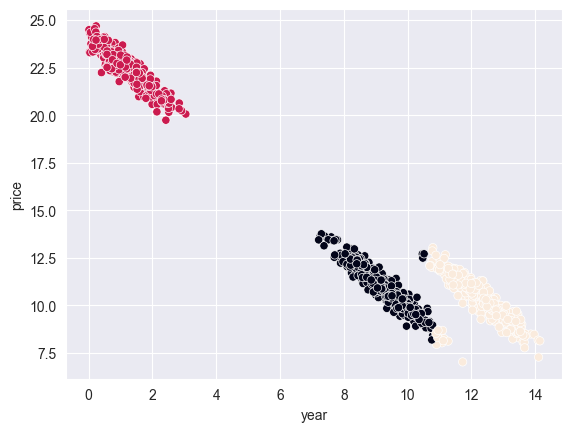

In [408]:
#Проводим такую же кластеризацию только при помощи k-means

#Создаем модель кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)

#Обучаем модель 
kmeans.fit(X_5_4)

#Предсказываем значения 
kmeans_prediction_5_5 = kmeans.predict(X_5_4)

#Сохраняем предсказания в датафрейм
df_5_4['Clusters_GM_5_5_kmeans'] = kmeans_prediction_5_5

#Визуализируем
sns.scatterplot(x=df_5_4.year, y=df_5_4.price, c=df_5_4.Clusters_GM_5_5_kmeans);

## Спектральная кластеризация

### Запуск спекртральной кластеризации

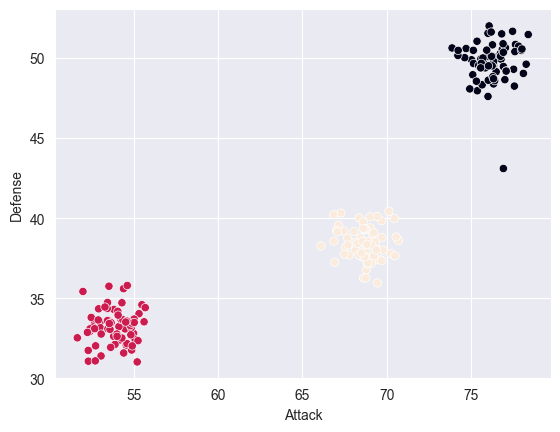

In [409]:
#Вызываем из sklearn SpectralClustering
from sklearn.cluster import SpectralClustering

#Запускаем кластеризацию, задав количество кластеров, равное 3
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

#Обучаем модель 
spectral_clustering.fit(X)
#Получаем результаты кластеризации
spectral_prediction = spectral_clustering.labels_
#Добавим предсказание в df
df['Clusters_spectral_K3'] = spectral_prediction

sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_spectral_K3);

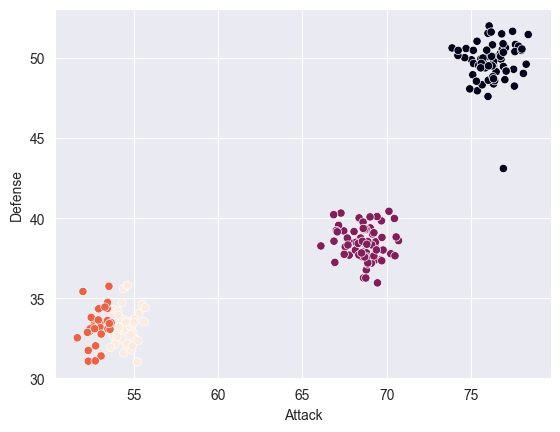

In [410]:
#Вызываем из sklearn SpectralClustering
from sklearn.cluster import SpectralClustering

#Запускаем кластеризацию, задав количество кластеров, равное 4
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42)

#Обучаем модель 
spectral_clustering.fit(X)
#Получаем результаты кластеризации
spectral_prediction = spectral_clustering.labels_
#Добавим предсказание в df
df['Clusters_spectral_K4'] = spectral_prediction

sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_spectral_K4);

## Кластеризация на основе плотности (DBSCAN)

### Запуск DBSCAN

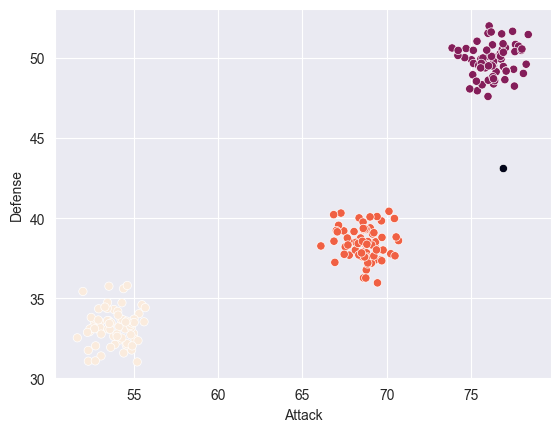

In [411]:
#Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(X)

#Далее можно визуализирвоать результаты, 
#как мы это делали с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_);

### Задание 7.5

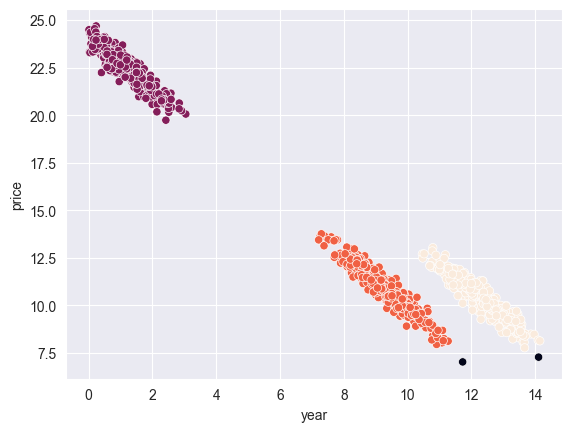

In [412]:
#Выполнить кластеризацию данных про цены квартир при помощи DBSCAN
#Выяснить, сколько точке размечены как выбросы


#Загружаем данные
df_7_5 = pd.read_csv('data/housing.csv')
X=df_7_5

#Загружаем модель кластеризации и обучаем ее на данных
clustering_7_5 = DBSCAN()

#Обучаем модель
clustering_7_5.fit(X)

#Визуализируем результаты
sns.scatterplot(x=df_7_5.year, y=df_7_5.price, c=clustering_7_5.labels_);

### Задание 7.6

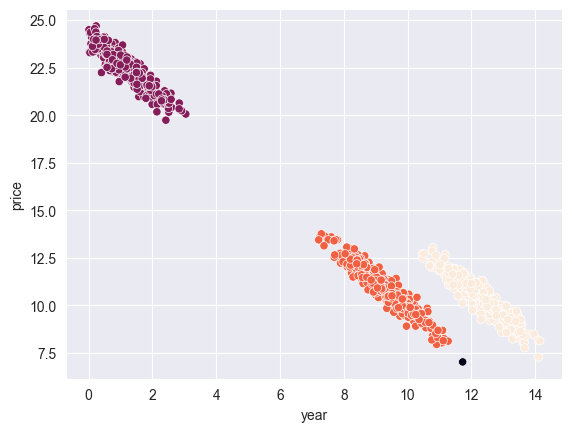

In [413]:
#Подбираем значения параметров, чтобы не было отмечено ложного выброса

#Загружаем модель кластеризации и обучаем ее на данных
clustering_7_5 = DBSCAN(eps=0.7, min_samples=5)

#Обучаем модель
clustering_7_5.fit(X)

#Визуализируем результаты
sns.scatterplot(x=df_7_5.year, y=df_7_5.price, c=clustering_7_5.labels_);

## Визуализация результатов кластеризации

In [414]:
#Импортируем библиотеки, которые нам понадобятся для работы 
#с датафреймом, кластеризацией и визуализацией
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#Загрузим наши данные
df = pd.read_csv('data/airbnb.csv')
display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


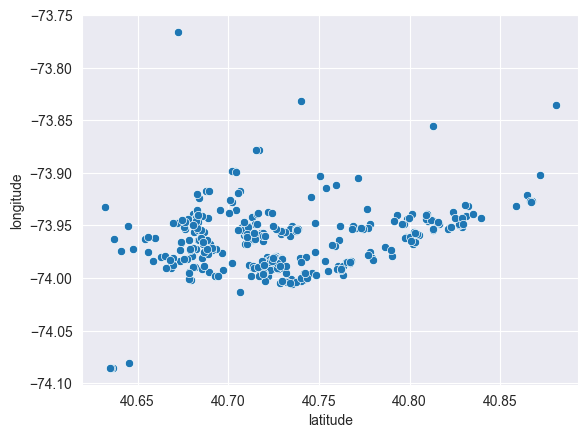

In [415]:
#Визуализируем данные основываясь на широте и долготе
sns.scatterplot(x=df.latitude, y=df.longitude);

### 2D-визуализация кластеров и центройдов

### Диаграмма рассеяния

In [416]:
#Инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

#Обучим модель
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

#Сохраним предсказания в датафрейм
df['clusters'] = predictions

#С помощью метода cluster_centers_ найдем координаты 
#центройдов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

#Для шести кластеров сохраним в отдельные списки 
#значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

#Зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

#Создадим пустые словари, чтобы потом соотнести координаты 
#x и y центроидов разных кластеров, а также цвета
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

#Итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    #Сохраняем в словарь номер кластера в качестве ключа, 
    #значение координаты x центроида - в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    #Сохраняем в словарь номер кластера в качестве ключа, 
    #значение координаты y центроида - в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    #Сохраняем в словарь номер кластера в качестве ключа, 
    #значение цвета - в качестве значения
    colors_dict[i] = colors[i]
    

In [417]:
#Создадим новые столбцы, данные о центроидах для различных кластеров
df['cen_x'] = df.clusters.map(centroids_x_dict)
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1,40.686769,-73.960661,#81DF20
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,40.756502,-73.960565,#DF2020
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,3,40.819774,-73.942044,#DF20C8
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,40.686769,-73.960661,#81DF20
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,3,40.819774,-73.942044,#DF20C8


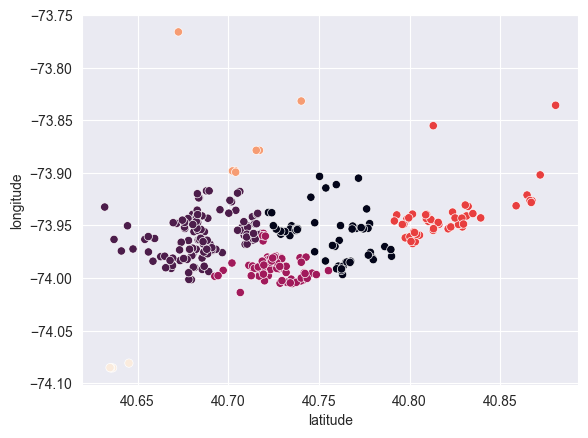

In [418]:
#Можем просто визуализировать полученные кластеры 
#(автоматический подбор цвета)
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.clusters);


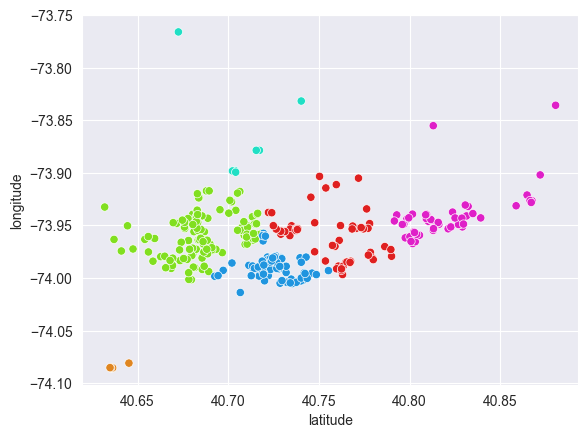

In [419]:
#Если хотим задать определенные цвета для кластеров, 
#передадим столбец с заданными цветами
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color);

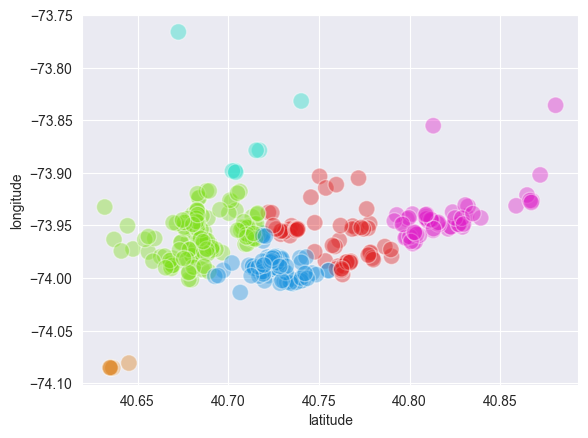

In [420]:
#Можно добавить переменную размера точек s 
#и переменную прозрачности alpha
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha= 0.4, s=140);

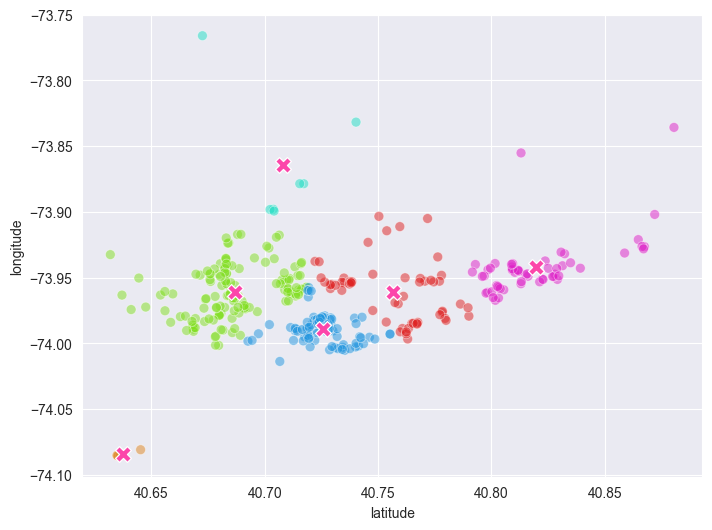

In [421]:
#Визуализируем все данные датасета с центроидами 

fig, axes = plt.subplots(figsize=(8, 6))
#Визуализируем элементы датасета
#Параметр с отвечает за цвет элемента в зависимости от того, 
#к какому кластеру он принадлежит
#s отвечает за размер объектов на графике, 
#alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, s=50, alpha=0.5);
#Визуализируем центроиды: отметим их на графике крестиком 
#(marker='X') и зададим им розовый цвет
sns.scatterplot(x=centroids_x, y=centroids_y, marker='X', c=['#FC46AA'], s=130);
#хотя по моему лучше было бы сделать другой цвет, например черный


### CONVEX HULL

In [422]:
#Для построения выпуклой обоочки каждого кластера 
#воспользуемся библиотекой scipy и классом ConvexHull
#Установили scipy через терминал

In [423]:
#При помощи метода vertices можно получить индексы точек из points
#которые образуют вершины выпуклой оболочки
from scipy.spatial import ConvexHull 
points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

array([0, 4, 3, 2], dtype=int32)

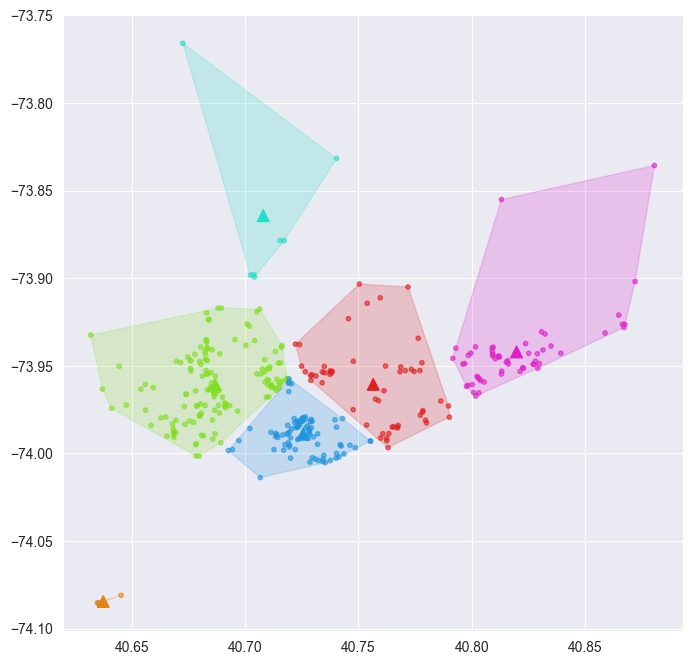

In [424]:
#Построим выпуклую оболочку для каждого кластера на наших данных

#Загружаем необходимые библиотеки 
from scipy.spatial import ConvexHull
import numpy as np

fig, ax = plt.subplots(1, figsize=(8,8))

#Визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha=0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

#Найдем уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    #Запишем в points значения признаков широты и долготы, 
    #принадлежащие к i-му кластеру
    points = df[df.clusters== i][['latitude', 'longitude']].values
    
    hull = ConvexHull(points)
    
    #Запишем координаты оболочки по оси x. Из hull.vertices
    #узнаем индексы элементов, входящих в оболочку
    #Так как оболочка должна быть замкнутой, 
    #то в конце добавляем еще раз нулевой элемент
    x_hull = np.append(points[hull.vertices, 0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices, 1],
                       points[hull.vertices,1][0])
    
    #Рисуем оболочку и заливаем ее таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

### Дендрограмма

In [425]:
#Запустим агломеративную кластеризацию на наших данных
from sklearn.cluster import AgglomerativeClustering

#Запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

#Обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])


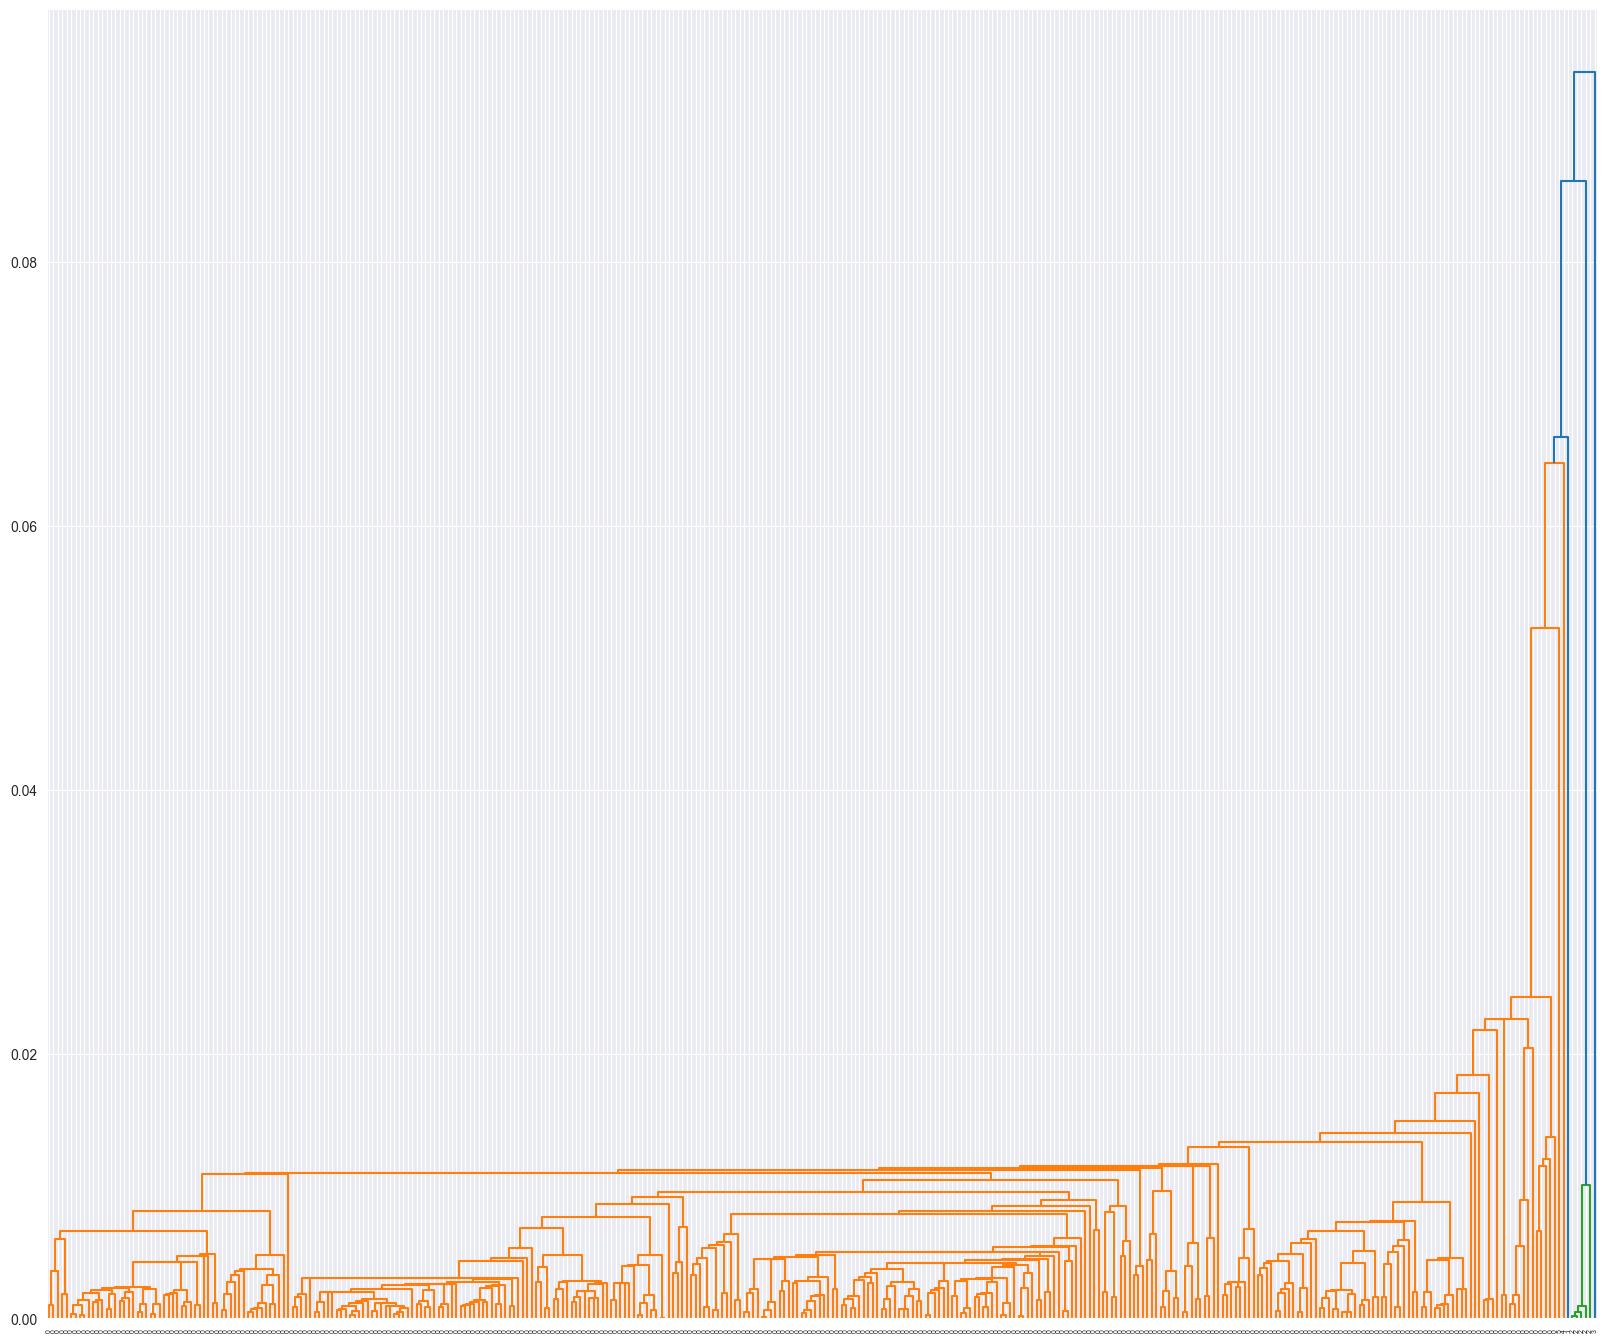

In [426]:
#Визуализируем результаты

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

#Рассчитываем расстояния между кластерами
linked = linkage(df[['latitude', 'longitude']], 'single')

plt.figure(figsize=(20,17))

#Визуализируем дендрограмму с ориентацией top
#Сначала будут отрисовываться кластеры с минимальным 
#расстоянием между ними
dendrogram(Z=linked,
           orientation='top',
           labels=predictions_ag_model,
           distance_sort='descending')
plt.show()

### CLUSTERGRAM

In [427]:
#Устанавливаем данную библиотеку через терминал

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.005 seconds.
K=3 fitted in 0.008 seconds.
K=4 fitted in 0.005 seconds.
K=5 fitted in 0.005 seconds.
K=6 fitted in 0.006 seconds.
K=7 fitted in 0.005 seconds.
K=8 fitted in 0.006 seconds.


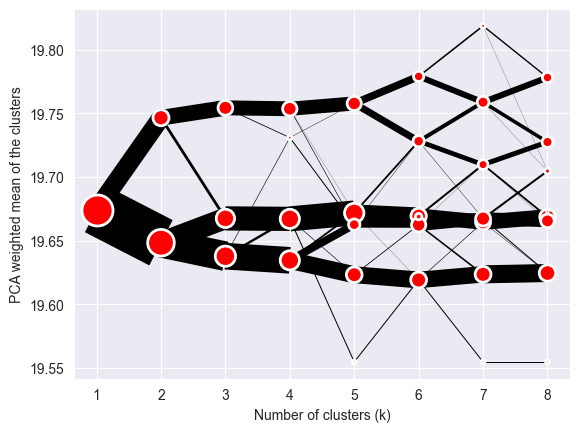

In [428]:
#Импортируем библиотеку clustergram
from clustergram import Clustergram

#Задаем количество кластеровЮ для которых хотим получить 
#визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1,9), method='kmeans')

#Запускаем алгоритм 
cgram.fit(df[['latitude', 'longitude']])
cgram.plot();

### 3D-визуализация

In [429]:
#Инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

#Обучим k-means-модель кластеризации на данных широты, долготы и цены
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

#Сохраним предсказания в колонку clusters датафрейма
df['clusters_3d'] = kmeans_predictions

Не знаю почему оно по этому методу не визуализирует. Типо не видет x и y. лучше сразу делать через plotly express

In [430]:
# #Визуализация с помощью библиотеки Matplotlib
# from mpl_toolkits.mplot3d import Axes3D

# #Создадим трехмерный объект
# fig = plt.figure(figsize=(6,6))
# ax = Axes3D(fig)
# #Добавляем дополнительную ось в объект картинки
# fig.add_axes(ax)

# #Визуализируем данные, передав значения x, y, z, а также
# #информацию о группировке данных по цветам
# ax.scatter(x=df.longitude.to_list(), y=df.latitude.to_list(), z=df.price.to_list(), c=df.clusters_3d)
# #Добавим оси
# ax.set_xlabel('latitude')
# ax.set_ylabel('longitude')
# ax.set_zlabel('price')

Также при помощи ax.azim и ax.elev можно вращать плоскости, но так как оно не работает, я не попробую. Да и зачем усложнять и зачем оно нужно когда можно сделать все намного проще.

In [431]:
#Сделаем нормальный график

import plotly
import plotly.express as px

#Передаем датафрейм и поля, которые нужно использовать для осей x, y и z
#В занчение color передаем номера кластеров

fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude',
    y = 'latitude',
    z = 'price',
    color = 'clusters',
    width = 1000,
    height = 700
)

#Отображаем график
fig.show()